# IMPORT THE LIBRARIES NECESSARY FOR THIS PROJECT

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# IMPORT AND VISUALIZE THE DATA

In [9]:
call911 = pd.read_csv("911.csv")
call911.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# SEE THE IMPORTANT DETAILS OF THE DATA SET

In [10]:
call911.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


# TOP 5 ZIPCODES FOR 911 CALLS

In [11]:
call911["zip"].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

# TOP 7 TOWNSHIPS FOR 911 CALLS

In [12]:
call911["twp"].value_counts().head(7)

LOWER MERION      8443
ABINGTON          5977
NORRISTOWN        5890
UPPER MERION      5227
CHELTENHAM        4575
POTTSTOWN         4146
UPPER MORELAND    3434
Name: twp, dtype: int64

# HOW MANY TITTLE UNIQUE CODES THERE ARE

In [15]:
print(f"There are {call911.title.nunique()} different codes")

There are 110 different codes


# SEPARATE THE TITLE REASON CODE INTO A NEW COLUMN

In [18]:
call911["Reason"] = call911["title"].apply(lambda title: title.split(":")[0])
call911["Reason"]

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

# MOST FREQUENT REASON CALL

In [19]:
call911["Reason"].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

# MOST FREQUENT CALL REASON BAR CHART

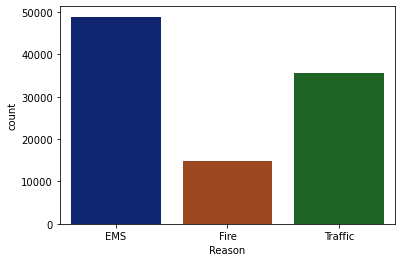

In [44]:
sns.countplot(x = "Reason", data= call911, palette = "dark")
plt.show()

# CONVERT STRING DATE INTO A DATETIME DATA

In [30]:
call911["timeStamp"] = pd.to_datetime(call911["timeStamp"])
call911["timeStamp"].head()

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

# CREATE A YEAR, MONTH, AND DAY NEW COLUMN

In [40]:
call911["Year"] = call911["timeStamp"].apply(lambda time:time.year)
call911["Month"] = call911["timeStamp"].apply(lambda time:time.month)
call911["Day"] = call911["timeStamp"].apply(lambda time:time.day)
call911["DayName"] = call911["timeStamp"].apply(lambda time:time.dayofweek)
#Creating a dict to change the number for the name of the day
nameDict = {0: "Monday", 1: "Tuesday",2: "Wednesday", 3 : "Thursday", 4:"Friday" , 5: "Saturday",6:"Sunday"}
call911["DayName"] = call911["DayName"].map(nameDict)

call911[["Year", "Month", "Day", "DayName"]].head()

,Year,Month,Day,DayName
0,2015,12,10,Thursday
1,2015,12,10,Thursday
2,2015,12,10,Thursday
3,2015,12,10,Thursday
4,2015,12,10,Thursday


## BAR CHAR TO SEE THE CALL DAY NAMEHISTORY, GROUP BY THE REASON CODE

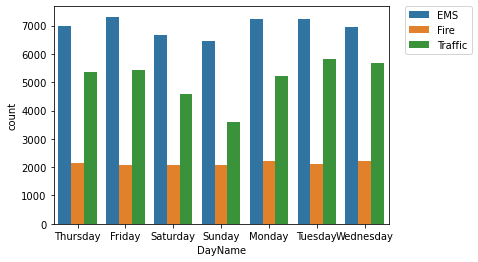

In [43]:
sns.countplot(x= "DayName", data = call911, hue = "Reason")
#change the position of the reason box
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

## BAR CHAR TO SEE THE CALL MONTH HISTORY, GROUP BY THE REASON CODE

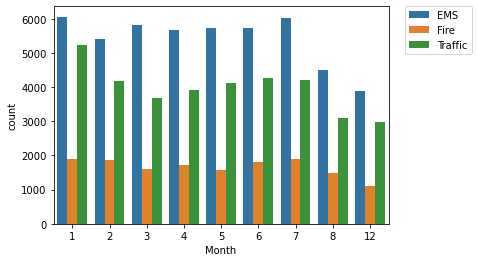

In [45]:
sns.countplot(x= "Month", data = call911, hue = "Reason")
#change the position of the reason box
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.show()

# LINEAR MODEL PLOT

In [51]:
byMonth = call911.groupby("Month").count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Year,Day,DayName
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


In [ ]:
byMonth

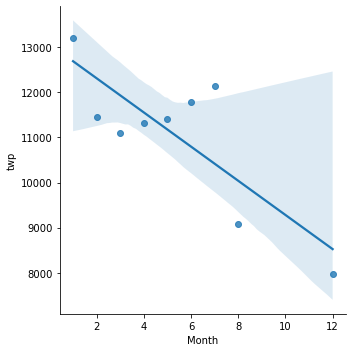

In [52]:
sns.lmplot(x= "Month", y= "twp", data = byMonth.reset_index())

# CREATE ANOTHER COLUMN WITH DATA TYPE DATA

In [55]:
call911["Date"] = call911["timeStamp"].apply(lambda t:t.date())
call911["Date"].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: Date, dtype: object

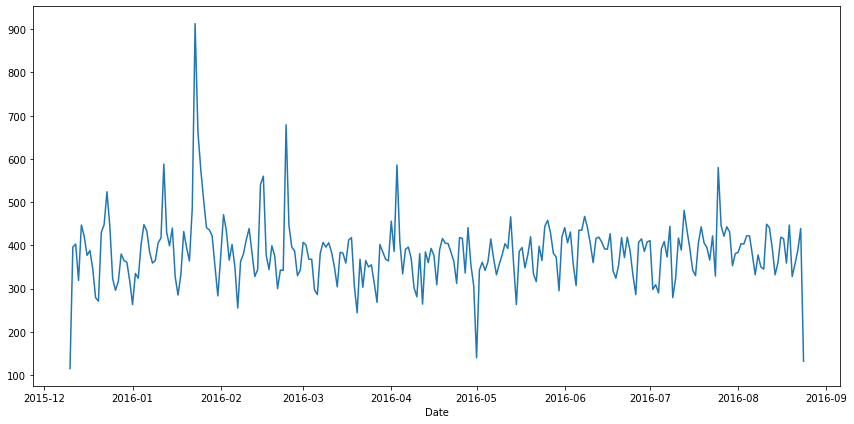

In [73]:
plt.figure(figsize =(12,6))
call911.groupby("Date").count()["lat"].plot()
plt.tight_layout()


# CREATE A HEATMAP

In [71]:
daynameDay = call911.groupby(by=["DayName", "Day"]).count()["Reason"].unstack()

<AxesSubplot:xlabel='Day', ylabel='DayName'>

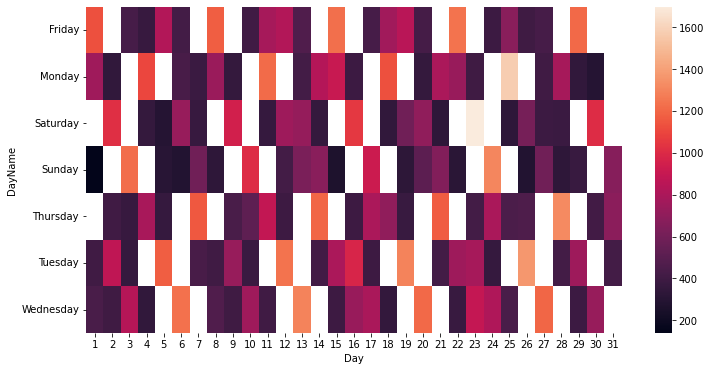

In [74]:
plt.figure(figsize =(12,6))
sns.heatmap(daynameDay)